In [3]:
4

4

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

weather_df = pd.read_csv("D:\RESEARCH\Dasarnya\MATH\Step_4_Statistics and Calculus Python\My Source Code\Work_3\weather_data.csv")
weather_df

,day,city,weather
0,0,St Louis,sunny
1,0,New York,cloudy
2,0,San Francisco,sunny
3,1,New York,rain
4,1,St Louis,cloudy
5,1,San Francisco,windy
6,2,San Francisco,sunny
7,2,New York,cloudy
8,2,St Louis,cloudy
9,3,New York,sunny


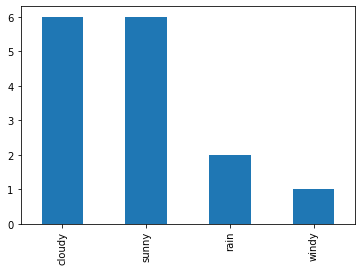

In [5]:
weather_df['weather'].value_counts().plot.bar()
plt.show()

Memvisualisasikan informasi yang sama seperti step sebelumnya

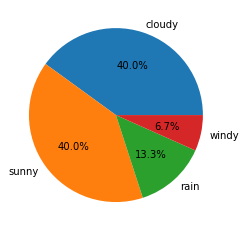

In [6]:
weather_df['weather'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel("")
plt.show()

Sekarang kita visualisasikan jumlah jenis cuaca ini. sekalian dengan informasi ttg persentase yang dihitung setiap jenis cuaca. Di sini saya akan menggunakan metode groupby()

In [7]:
weather_df.groupby(['weather','city'])['weather'].count().unstack('city')

city,New York,San Francisco,St Louis
weather,,,
cloudy,3.0,NaN,3.0
rain,1.0,NaN,1.0
sunny,1.0,4.0,1.0
windy,NaN,1.0,NaN


Kita lihat, objek ini memuat informasi yang kita butuhkan. Selanjutnya, kita akan memvisualisasi tabel yang kita punya dengan menggunakan <i>stacked bar plot</i>

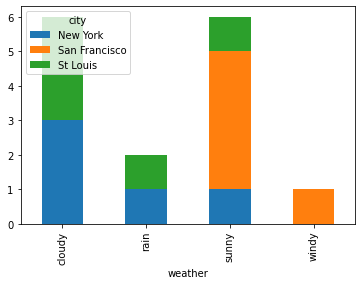

In [8]:
weather_df.groupby(['weather','city'])['weather'].count().unstack('city').fillna(0).plot(kind='bar',stacked=True)
plt.show()

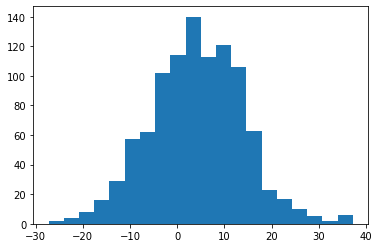

In [9]:
import numpy as np

samples = np.random.normal(4, 10, size=1000)
plt.hist(samples,bins=20)
plt.show()

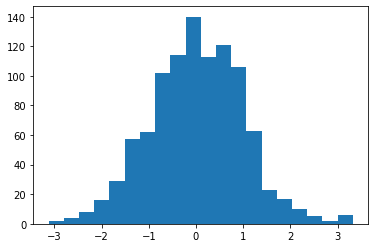

In [10]:
normalized_samples = (samples - 4)/10
plt.hist(normalized_samples,bins=20)
plt.show()

In [11]:
sample_mean = np.mean(samples)
sample_sd = np.std(samples)

In [12]:
print(sample_mean)
print(sample_sd)

4.148154779723927
9.832006353181642


### MIN-MAX SCALING

Dalam dataset ini, 'Kolom 1' isinya 1000 sampel dari distribusi normal dengan mean 4 juga memiliki STD dengan nilai 10. 'Kolom 2' berisi 1000 sampel juga, dengan distribusi seragam dari 1 sampai 2. 'Kolom 3' berisi 1000 sampel dari distibusi beta berparameter 2 dan 5

In [13]:
df = pd.read_csv("D:\RESEARCH\Dasarnya\MATH\Step_4_Statistics and Calculus Python\My Source Code\Work_3\data.csv")
df

,Column 1,Column 2,Column 3
0,-1.231356,1.305917,0.511994
1,7.874195,1.291636,0.155032
2,13.169984,1.274973,0.183988
3,13.442203,1.549126,0.391825
4,-8.032985,1.895236,0.398122
...,...,...,...
995,-6.698953,1.030317,0.153306
996,14.777217,1.671622,0.204935
997,7.226261,1.098545,0.312753
998,-10.736601,1.116582,0.560168


Gunakan fungsi <b>min_max_scale</b> yang mengambil tiga parameter (data, a, b). Data harus berupa array dalam atribut dataset, sementara a dan be menentukan rentang tmpat data nantinya akan diubah.<br><br>
Di sini kita menggunakan operasi vektorisasi

In [14]:
def min_max_scale(data,a,b):
    data_max = np.max(data)
    data_min = np.min(data)
    return a + (b-a)*(data - data_min)/(data_max - data_min)

Untuk melihat efeknya, kita visualisasi terlebih dahulu

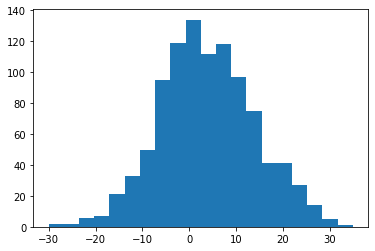

In [15]:
plt.hist(df['Column 1'],bins=20)
plt.show()

Selanjutnya, pakai fungsi <b>plt.hist()</b> untuk memvisualisasi nilai yang sudah direturn dari fungsi minmaxscale untuk menskalakannya ke rentang [-3, 3]

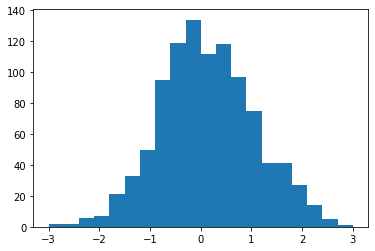

In [16]:
plt.hist(min_max_scale(df['Column 1'],-3,3),bins=20)
plt.show()

Dengan proses yang sama, untuk kolom 2

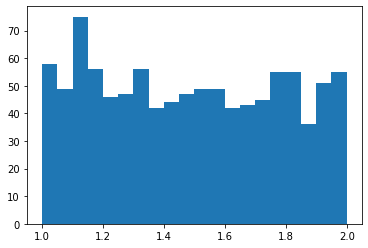

In [17]:
plt.hist(df['Column 2'], bins=20)
plt.show()

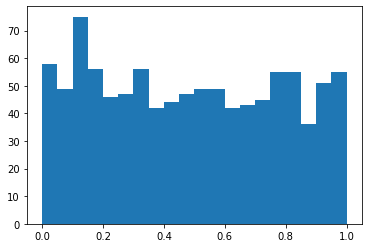

In [18]:
plt.hist(min_max_scale(df['Column 2'], 0, 1), bins=20)
plt.show()

Lagi-lagi untuk kolom 3

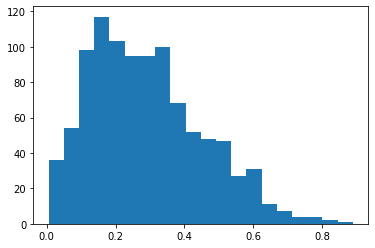

In [19]:
plt.hist(df['Column 3'], bins=20)
plt.show()

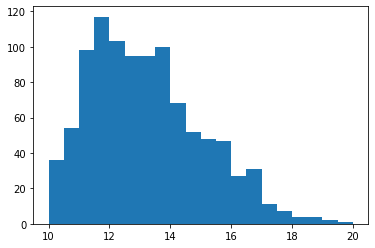

In [20]:
plt.hist(min_max_scale(df['Column 3'], 10, 20), \
                          bins=20)
plt.show()

### Visualizing Probability Density Functions

In [21]:
import numpy as np
import matplotlib.pyplot as plt

samples = np.random.normal(size=1000) # Create 1000 samples from normal D
mean = np.mean(samples)
median = np.median(samples)

q1 = np.percentile(samples,25)
q2 = np.percentile(samples,75)

In [22]:
print(mean)
print(median)
print(q1)
print(q2)

0.031366654876089604
0.037102537701255066
-0.6277754169348243
0.6981547022219304


Setelah itu, kita visualisasi menggunakan histogram, masing-masing kuratil buat dengan modelnya tersendiri

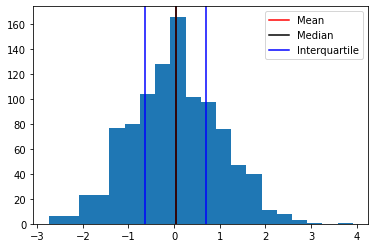

In [23]:
plt.hist(samples,bins=20)
plt.axvline(x=mean,c='red',label='Mean')
plt.axvline(x=median,c='black',label='Median')
plt.axvline(x=q1,c='blue',label='Interquartile')
plt.axvline(x=q2,c='blue')
plt.legend()
plt.show()

Terapkan metode generate data <i>beta</i> yang sama, dengan tambahkan parameter 2 dan 5, setelah itu visualisasi dengan cara yang sama

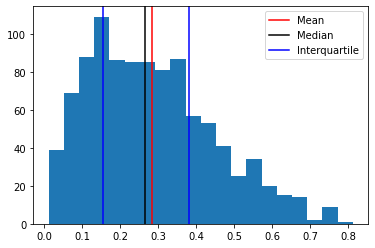

In [24]:
samples = np.random.beta(2, 5, size=1000) # Look at here!
mean = np.mean(samples)
median = np.median(samples)
q1 = np.percentile(samples, 25)
q2 = np.percentile(samples, 75)

plt.hist(samples, bins=20)
plt.axvline(x=mean, c='red', label='Mean')
plt.axvline(x=median, c='black', label='Median')
plt.axvline(x=q1, c='blue', label='Interquartile')
plt.axvline(x=q2, c='blue')
plt.legend()
plt.show()

Sekarang, gunakan gamma dengan parameter 5. Visualisasikan dengan cara yang sama

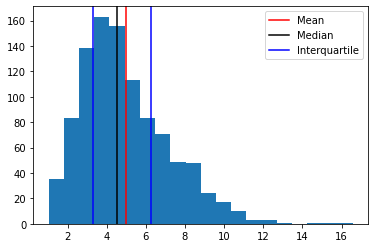

In [25]:
samples = np.random.gamma(5, size=1000) # Look at here!
mean = np.mean(samples)
median = np.median(samples)
q1 = np.percentile(samples, 25)
q2 = np.percentile(samples, 75)

plt.hist(samples, bins=20)
plt.axvline(x=mean, c='red', label='Mean')
plt.axvline(x=median, c='black', label='Median')
plt.axvline(x=q1, c='blue', label='Interquartile')
plt.axvline(x=q2, c='blue')
plt.legend()
plt.show()

In [26]:
df = pd.DataFrame({'numerical': np.random.normal(size=5),\
                   'categorical': ['a', 'b', 'a', 'c', 'b'],\
                   'ordinal': [1, 2, 3, 5, 4]})

In [27]:
df

,numerical,categorical,ordinal
0,1.560117,a,1
1,-0.118639,b,2
2,-1.119199,a,3
3,1.421207,c,5
4,0.777676,b,4


In [28]:
df.describe()

,numerical,ordinal
count,5.000000,5.000000
mean,0.504232,3.000000
std,1.124056,1.581139
min,-1.119199,1.000000
25%,-0.118639,2.000000
50%,0.777676,3.000000
75%,1.421207,4.000000
max,1.560117,5.000000


In [29]:
df.describe(include='all')

,numerical,categorical,ordinal
count,5.000000,5,5.000000
unique,NaN,3,NaN
top,NaN,a,NaN
freq,NaN,2,NaN
mean,0.504232,NaN,3.000000
std,1.124056,NaN,1.581139
min,-1.119199,NaN,1.000000
25%,-0.118639,NaN,2.000000
50%,0.777676,NaN,3.000000
75%,1.421207,NaN,4.000000


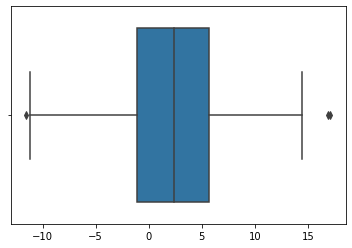

In [30]:
sns.boxplot(np.random.normal(2,5,size=1000))
plt.show()

In [31]:
df = pd.DataFrame({'numerical': np.random.normal(size=1000),\
                   'categorical': np.random.choice\
                                  (['a', 'b', 'c'], size=1000),\
                   'ordinal': np.random.choice\
                              ([1, 2, 3, 4, 5], size=1000)})

In [32]:
df

,numerical,categorical,ordinal
0,0.768676,b,4
1,-0.852824,c,3
2,-1.070324,c,4
3,-1.108446,a,1
4,-1.744581,a,4
...,...,...,...
995,0.102069,c,5
996,0.301859,b,1
997,-0.136238,c,3
998,-0.261140,c,3


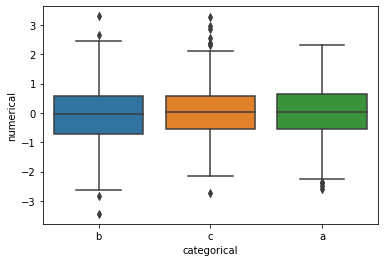

In [33]:
sns.boxplot(y='numerical',x='categorical',data=df)
plt.show()

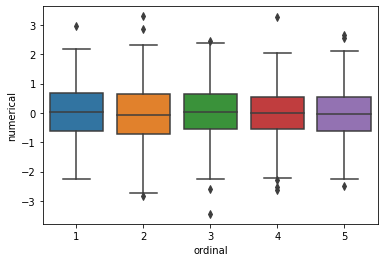

In [34]:
sns.boxplot(y='numerical',x='ordinal',data=df)
plt.show()

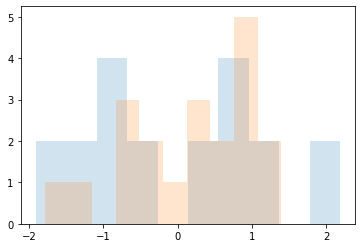

In [36]:
samples_a = np.random.normal(size=20)
samples_b = np.random.normal(0.2,1,size=20)

plt.hist(samples_a, alpha=0.2)
plt.hist(samples_b, alpha=0.2)
plt.show()

In [38]:
import scipy

scipy.stats.ttest_ind(samples_a,samples_b).pvalue

0.5667453090486284

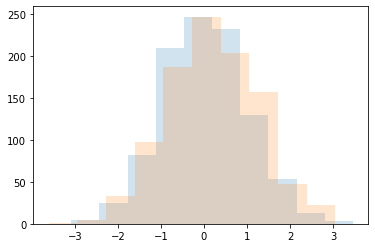

In [39]:
samples_a = np.random.normal(size=1000)
samples_b = np.random.normal(0.2, 1, size=1000)
plt.hist(samples_a, alpha=0.2)
plt.hist(samples_b, alpha=0.2)
plt.show()

In [40]:
scipy.stats.ttest_ind(samples_a,samples_b).pvalue

4.271872581669068e-05

In [41]:
x = np.random.rand(500,)
y = x * 2 + np.random.normal(0, 0.3, 500)
z = np.random.rand(500,)

df = pd.DataFrame({'x': x, 'y': y, 'z': z})
df

,x,y,z
0,0.129705,0.412621,0.546612
1,0.344989,0.961095,0.755842
2,0.742125,1.754058,0.491986
3,0.443424,0.305411,0.976728
4,0.757292,1.492673,0.903882
...,...,...,...
495,0.551629,1.450323,0.661476
496,0.293334,0.762932,0.302909
497,0.256892,0.127691,0.334822
498,0.904669,2.346703,0.289718


In [42]:
df.corr()

,x,y,z
x,1.000000,0.869834,-0.050252
y,0.869834,1.000000,-0.072321
z,-0.050252,-0.072321,1.000000


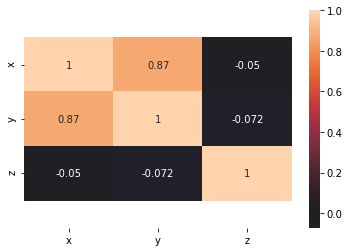

In [43]:
sns.heatmap(df.corr(),center=0,annot=True)
bottom, top = plt.ylim()

plt.ylim(bottom + 0.5, top - 0.5)
plt.show()

### Mengidentifikasi dan Menguji Kesamaan dari Means

In [45]:
# Using two inferential statistics methods!
# Tujuannya adalah mengidentifikasi atribut mana dalam kumpulan data ini yang berkorelasi satu sama lain dan kemudian menerapkan T-Test untuk menentukan apakah ada pasangan atribut yang memiliki mean yang sama.

import seaborn as sns

In [46]:
df = pd.read_csv("D:\RESEARCH\Dasarnya\MATH\Step_4_Statistics and Calculus Python\My Source Code\Work_3\data_2.csv")
df

,x,y,z,t
0,0.108610,0.901637,3.495175,5.548247
1,1.441267,1.666423,3.554596,-3.839294
2,-0.492374,0.112673,3.902964,13.713320
3,1.106691,0.754194,3.447355,8.432243
4,1.553509,3.087109,3.756501,-1.373107
...,...,...,...,...
195,1.493377,1.492880,3.925922,7.017622
196,2.026095,2.619088,3.566304,4.266780
197,1.645892,1.843177,3.300479,19.727741
198,5.199665,6.485575,3.315931,23.108194


Pada cell selanjutnya, kita gunakan heatmap untuk memvisualisasikan korelasi antar variable pada dataset yang sudah kita load sebelumnya

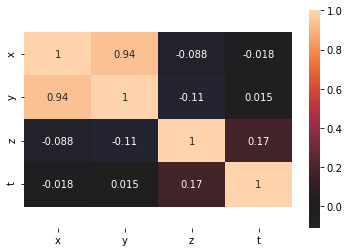

In [47]:
sns.heatmap(df.corr(),center=0,annot=True)
bottom, top = plt.ylim()

plt.ylim(bottom + 0.5, top - 0.5)
plt.show()

Gunakan jointplot pada library seaborn, setelah itu kita akan membuat plot gabungan dari 2 jenis, scatter plot pada two dimensional plane, dan 2 histogram yg merepresentasikan distribusi dari value2 tersebut

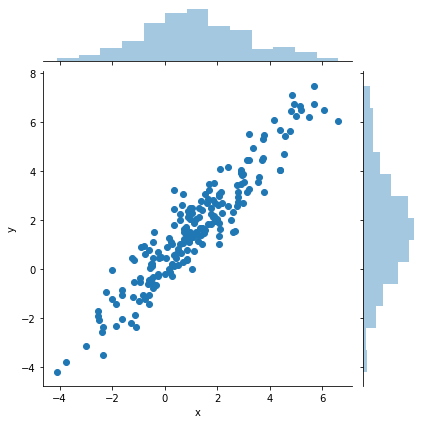

In [49]:
# Actually it is not clear whether the two attributes have the same mean or not
sns.jointplot(x='x',y='y',data=df)
plt.show()

Selanjutnya, kita gunakan T-Test untuk mengetahui apakah kedua atribut memiliki mean yang sama

In [52]:
scipy.stats.ttest_ind(df['x'],df['y']).pvalue

0.011436482008949079

See? p-value dibawah 0.05, mengindikasikan untuk menolak null hypothesis, kedua distribusi memiliki rata-rata yang sama

In [53]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [54]:
model.fit(df[['x','z']],df['y'])

LinearRegression()

In [55]:
model.coef_

array([ 1.06862616, -0.23163518])

In [56]:
model.predict([[1,2],[2,3]])

array([1.87603234, 2.71302333])